# Orbital Elements

This program finds the orbital elements from the initial position and velocity

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as ani
from IPython.display import display, clear_output, HTML

In [67]:
#Central mass (at the origin)
central_mass = 1.24e10
G = 1
mu = G*central_mass

mass = 1e9  #mass of the satellite
r = np.array([10,0,3]) #position of the satellite
v = np.array([0,30,2])  #initial velocity

r_B = mass*r/(mass+central_mass)  #Position of the baricenter
print(r_B)

[0.74626866 0.         0.2238806 ]


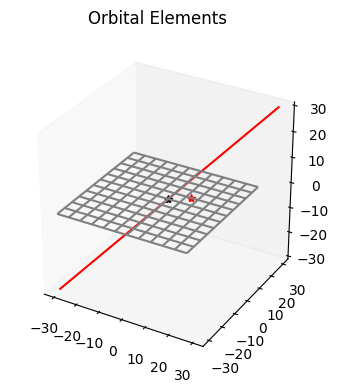

In [68]:
side = 30
fig = plt.figure(figsize=(5, 4))
fig.suptitle('Orbital Elements')
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')
ax.grid(False)
X = np.arange(-side, side, 5)
Y = np.arange(-side, side, 5)
X, Y = np.meshgrid(X, Y)
Z = 0.0*X*Y
central_body, = ax.plot(0.0,0.0,0.0, 'k*')
satellite, = ax.plot([-side, side],[-side, side],[-side, side], 'r*')
orbit, = ax.plot([-side, side],[-side, side],[-side, side], linestyle = '-', color = satellite.get_color())
satellite.set_data_3d([r[0]], [r[1]], [r[2]])
zero_plane = ax.plot_wireframe(X,Y,Z, color='gray')

In [69]:
def angle_between_vecs(v1,v2):
  mag1 = np.linalg.norm(v1)
  mag2 = np.linalg.norm(v2)
  return np.arccos(np.dot(v1,v2)/(mag1*mag2))

def inclination(r,v):
  L = np.cross(r,v)
  return np.rad2deg(angle_between_vecs(L, np.array([0,0,1])))

def nodal_longitude(r,v):
  if(inclination(r,v)==0.):
    return None
  else:
    l = np.array([L[0],L[1],0])
    return np.rad2deg(angle_between_vecs(l,np.array([1,0,0])))

In [70]:
print(inclination(r,v))
print(nodal_longitude(r,v))

17.08314324645285
167.47119229084848
